### Import Kaggle dataset (ungrouped = including time stamps) 

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import warnings

In [ ]:
#data_df = pd.read_csv('owid-covid-data.csv')
#data_df = data_df.rename({'continent': 'country'}, axis='columns')

data_df = pd.read_csv('country_vaccinations.csv')
data_df.head()


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Argentina,ARG,2020-12-29,700.0,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
1,Argentina,ARG,2020-12-30,NaN,NaN,NaN,NaN,15656.0,NaN,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
2,Argentina,ARG,2020-12-31,32013.0,NaN,NaN,NaN,15656.0,0.07,NaN,NaN,346.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
3,Argentina,ARG,2021-01-01,NaN,NaN,NaN,NaN,11070.0,NaN,NaN,NaN,245.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...
4,Argentina,ARG,2021-01-02,NaN,NaN,NaN,NaN,8776.0,NaN,NaN,NaN,194.0,Sputnik V,Ministry of Health,http://datos.salud.gob.ar/dataset/vacunas-cont...


In [ ]:
#change all NaNs in the ungrouped dataset to 0 
data_df.isnull().sum()

country                                   0
iso_code                                153
date                                      0
total_vaccinations                      450
people_vaccinated                       481
people_fully_vaccinated                1125
daily_vaccinations_raw                  623
daily_vaccinations                       57
total_vaccinations_per_hundred          450
people_vaccinated_per_hundred           481
people_fully_vaccinated_per_hundred    1125
daily_vaccinations_per_million           57
vaccines                                  0
source_name                               0
source_website                            0
dtype: int64

In [ ]:
data_df = data_df.replace(np.nan, 0)
data_df.isnull().sum()
data_df.to_csv('country_vaccinations_ungrouped.csv')



```
# This is formatted as code
```

### Now grouping the dataset by country & type of vaccine 

In [ ]:
country_vaccine = data_df.groupby(["country", "iso_code", "vaccines"])['total_vaccinations', 
                                                                       'total_vaccinations_per_hundred',
                                                                      'daily_vaccinations',
                                                                      'daily_vaccinations_per_million',
                                                                      'people_vaccinated',
                                                                      'people_vaccinated_per_hundred'
                                                                      ].max().reset_index()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
country_vaccine.columns = ["Country", "iso_code", "Vaccines", "Total vaccinations", "Percent", "Daily vaccinations", 
                           "Daily vaccinations per million", "People vaccinated", "People vaccinated per hundred"]

In [ ]:
country_vaccine.head()

,Country,iso_code,Vaccines,Total vaccinations,Percent,Daily vaccinations,Daily vaccinations per million,People vaccinated,People vaccinated per hundred
0,Argentina,ARG,Sputnik V,279602.0,0.62,15656.0,346.0,254456.0,0.56
1,Austria,AUT,Pfizer/BioNTech,169554.0,1.88,12552.0,1394.0,169554.0,1.88
2,Bahrain,BHR,"Pfizer/BioNTech, Sinopharm",144130.0,8.47,11106.0,6527.0,144130.0,8.47
3,Belgium,BEL,Pfizer/BioNTech,163240.0,1.41,13135.0,1133.0,162945.0,1.41
4,Brazil,BRA,Sinovac,462269.0,0.22,66038.0,311.0,462269.0,0.22


In [ ]:
country_vaccine.dtypes

Country                            object
iso_code                           object
Vaccines                           object
Total vaccinations                float64
Percent                           float64
Daily vaccinations                float64
Daily vaccinations per million    float64
People vaccinated                 float64
People vaccinated per hundred     float64
dtype: object

In [ ]:
country_vaccine.isnull().sum()

Country                           0
iso_code                          0
Vaccines                          0
Total vaccinations                0
Percent                           0
Daily vaccinations                0
Daily vaccinations per million    0
People vaccinated                 0
People vaccinated per hundred     0
dtype: int64

In [ ]:
country_vaccine.Vaccines

0                               Sputnik V
1                         Pfizer/BioNTech
2              Pfizer/BioNTech, Sinopharm
3                         Pfizer/BioNTech
4                                 Sinovac
5                Moderna, Pfizer/BioNTech
6                Moderna, Pfizer/BioNTech
7                         Pfizer/BioNTech
8                           CNBG, Sinovac
9                         Pfizer/BioNTech
10                        Pfizer/BioNTech
11                        Pfizer/BioNTech
12               Moderna, Pfizer/BioNTech
13               Moderna, Pfizer/BioNTech
14    Oxford/AstraZeneca, Pfizer/BioNTech
15                        Pfizer/BioNTech
16                        Pfizer/BioNTech
17                        Pfizer/BioNTech
18               Moderna, Pfizer/BioNTech
19                        Pfizer/BioNTech
20                        Pfizer/BioNTech
21       Pfizer/BioNTech, Pifzer/BioNTech
22               Moderna, Pfizer/BioNTech
23                    Covaxin, Cov

In [ ]:
country_vaccine.to_csv('country_vaccinations_grouped_new.csv', sep=';')



## Analysing Tweets 

# 1) Pre-processing Tweets 

In [ ]:
tweets = pd.read_csv('tweets.csv')

In [ ]:
tweets.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1353087937206870016,seemorerocks,"RT @TruNews: Next time you're at @Walmart, get...",Sat Jan 23 21:11:18 +0000 2021,23/01/2021 21:11:18,NaN,NaN,NaN,NaN,362151710,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4707799903...,440.0,623.0,"Wellington, NZ",http://twitter.com/seemorerocks/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1,1353087935286022145,Santiaguerra2,@Boomclaw @ChrisStirk @JoTibballs @Peston The ...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,7.177318e+17,Boomclaw,1239225539774296065,1.353056e+18,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1311005089...,74.0,61.0,NaN,http://twitter.com/Santiaguerra2/statuses/1353...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
2,1353087934887567371,OceannaGreen,With my mom being a nurse &amp; always having ...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,1492212866,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1285874750...,126.0,493.0,United States,http://twitter.com/OceannaGreen/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]..."
3,1353087933113380869,NBC6News,A third-grade girl has been swamped by phone c...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,70677953,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://pbs.twimg.com/profile_images/1192536971...,11701.0,484.0,"Shreveport, LA",http://twitter.com/NBC6News/statuses/135308793...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]..."
4,1353087932006092804,JeanMarcVILLER,RT @FZores: Quelle surprise ! (Non)\nVa falloi...,Sat Jan 23 21:11:16 +0000 2021,23/01/2021 21:11:16,NaN,NaN,NaN,NaN,489310581,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/8558744993...,960.0,1253.0,Riom le Beau,http://twitter.com/JeanMarcVILLER/statuses/135...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."


In [ ]:
print(f'There are {len(tweets)} tweets in our collection')

There are 2949 tweets in our collection


In [ ]:
tweets['text']

0       RT @TruNews: Next time you're at @Walmart, get...
1       @Boomclaw @ChrisStirk @JoTibballs @Peston The ...
2       With my mom being a nurse &amp; always having ...
3       A third-grade girl has been swamped by phone c...
4       RT @FZores: Quelle surprise ! (Non)\nVa falloi...
                              ...                        
2944    It's more important than ever for people to ge...
2945    RT @Markyles: @MikeCarlton01 Giving an extra g...
2946    How Many Vaccine Shots Go to Waste? Several St...
2947    RT @VP: This week, @POTUS and I quickly got to...
2948    Canada being such a well off country and with ...
Name: text, Length: 2949, dtype: object

# 2) Sentiment Analysis
 

In [ ]:
# TextBlob - Python library for processing textual data
from textblob import TextBlob

# WordCloud - Python linrary for creating image wordclouds
from wordcloud import WordCloud

# Regular Expression Python module
import re

# Matplotlib - plotting library to create graphs and charts
import matplotlib.pyplot as plt

# Settings for Matplotlib graphs and charts
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8


In [ ]:
def cleanUpTweet(txt):
    # Remove mentions
    txt = re.sub(r'@[A-Za-z0-9_]+', '', txt)
    # Remove hashtags
    txt = re.sub(r'#', '', txt)
    # Remove retweets:
    txt = re.sub(r'RT : ', '', txt)
    # Remove urls
    txt = re.sub(r'https?:\/\/[A-Za-z0-9\.\/]+', '', txt)
    return txt

In [ ]:
tweets['text'] = tweets['text'].apply(cleanUpTweet)
tweets.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str
0,1353087937206870016,seemorerocks,"Next time you're at , getting groceries, you c...",Sat Jan 23 21:11:18 +0000 2021,23/01/2021 21:11:18,NaN,NaN,NaN,NaN,362151710,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4707799903...,440.0,623.0,"Wellington, NZ",http://twitter.com/seemorerocks/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
1,1353087935286022145,Santiaguerra2,The Oxford/AstraZeneca vaccine protects ag...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,7.177318e+17,Boomclaw,1239225539774296065,1.353056e+18,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1311005089...,74.0,61.0,NaN,http://twitter.com/Santiaguerra2/statuses/1353...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."
2,1353087934887567371,OceannaGreen,With my mom being a nurse &amp; always having ...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,1492212866,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1285874750...,126.0,493.0,United States,http://twitter.com/OceannaGreen/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]..."
3,1353087933113380869,NBC6News,A third-grade girl has been swamped by phone c...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,70677953,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://pbs.twimg.com/profile_images/1192536971...,11701.0,484.0,"Shreveport, LA",http://twitter.com/NBC6News/statuses/135308793...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]..."
4,1353087932006092804,JeanMarcVILLER,Quelle surprise ! (Non)\nVa falloir arrêter de...,Sat Jan 23 21:11:16 +0000 2021,23/01/2021 21:11:16,NaN,NaN,NaN,NaN,489310581,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/8558744993...,960.0,1253.0,Riom le Beau,http://twitter.com/JeanMarcVILLER/statuses/135...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{..."


In [ ]:
def getTextSubjectivity(txt):
    return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
    return TextBlob(txt).sentiment.polarity

In [ ]:
tweets['Subjectivity'] = tweets['text'].apply(getTextSubjectivity)
tweets['Polarity'] = tweets['text'].apply(getTextPolarity)

In [261]:
tweets.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,Subjectivity,Polarity,Score,user_location_clean,user_cities,user_countries,user_countries_fullnames
0,1353087937206870016,seemorerocks,"Next time you're at , getting groceries, you c...",Sat Jan 23 21:11:18 +0000 2021,23/01/2021 21:11:18,NaN,NaN,NaN,NaN,362151710,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4707799903...,440.0,623.0,"Wellington, NZ",http://twitter.com/seemorerocks/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.000000,0.00,Neutral,"Wellington, NZ",Wellington,US,United States
1,1353087935286022145,Santiaguerra2,The Oxford/AstraZeneca vaccine protects ag...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,7.177318e+17,Boomclaw,1239225539774296065,1.353056e+18,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1311005089...,74.0,61.0,NaN,http://twitter.com/Santiaguerra2/statuses/1353...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.783333,0.15,Positive,,,,
2,1353087934887567371,OceannaGreen,With my mom being a nurse &amp; always having ...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,1492212866,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1285874750...,126.0,493.0,United States,http://twitter.com/OceannaGreen/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",0.900000,0.60,Positive,United States,,US,United States
3,1353087933113380869,NBC6News,A third-grade girl has been swamped by phone c...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,70677953,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://pbs.twimg.com/profile_images/1192536971...,11701.0,484.0,"Shreveport, LA",http://twitter.com/NBC6News/statuses/135308793...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",0.000000,0.00,Neutral,"Shreveport, LA",Shreveport,US,United States
4,1353087932006092804,JeanMarcVILLER,Quelle surprise ! (Non)\nVa falloir arrêter de...,Sat Jan 23 21:11:16 +0000 2021,23/01/2021 21:11:16,NaN,NaN,NaN,NaN,489310581,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/8558744993...,960.0,1253.0,Riom le Beau,http://twitter.com/JeanMarcVILLER/statuses/135...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.000000,0.00,Neutral,Riom le Beau,Riom,FR,France


In [ ]:
def getTextAnalysis(a):
    if a < 0:
        return "Negative"
    elif a == 0:
        return "Neutral"
    else:
        return "Positive"

In [ ]:
tweets['Score'] = tweets['Polarity'].apply(getTextAnalysis)

In [263]:
tweets['Polarity']

0       0.000000
1       0.150000
2       0.600000
3       0.000000
4       0.000000
          ...   
2944    0.466667
2945   -0.125000
2946    0.100000
2947    0.333333
2948    0.226667
Name: Polarity, Length: 2949, dtype: float64

In [ ]:
tweets.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,Subjectivity,Polarity,Score
0,1353087937206870016,seemorerocks,"Next time you're at , getting groceries, you c...",Sat Jan 23 21:11:18 +0000 2021,23/01/2021 21:11:18,NaN,NaN,NaN,NaN,362151710,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4707799903...,440.0,623.0,"Wellington, NZ",http://twitter.com/seemorerocks/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.000000,0.00,Neutral
1,1353087935286022145,Santiaguerra2,The Oxford/AstraZeneca vaccine protects ag...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,7.177318e+17,Boomclaw,1239225539774296065,1.353056e+18,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1311005089...,74.0,61.0,NaN,http://twitter.com/Santiaguerra2/statuses/1353...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.783333,0.15,Positive
2,1353087934887567371,OceannaGreen,With my mom being a nurse &amp; always having ...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,1492212866,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1285874750...,126.0,493.0,United States,http://twitter.com/OceannaGreen/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",0.900000,0.60,Positive
3,1353087933113380869,NBC6News,A third-grade girl has been swamped by phone c...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,70677953,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://pbs.twimg.com/profile_images/1192536971...,11701.0,484.0,"Shreveport, LA",http://twitter.com/NBC6News/statuses/135308793...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",0.000000,0.00,Neutral
4,1353087932006092804,JeanMarcVILLER,Quelle surprise ! (Non)\nVa falloir arrêter de...,Sat Jan 23 21:11:16 +0000 2021,23/01/2021 21:11:16,NaN,NaN,NaN,NaN,489310581,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/8558744993...,960.0,1253.0,Riom le Beau,http://twitter.com/JeanMarcVILLER/statuses/135...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.000000,0.00,Neutral


In [ ]:
print('Example positive tweet:')
print(tweets['text'][1])

Example positive tweet:
    The Oxford/AstraZeneca vaccine protects against people becoming seriously ill with Covid. More data is needed to confirm protection against asymptomatic infections 


In [ ]:
tweets['Score']

0        Neutral
1       Positive
2       Positive
3        Neutral
4        Neutral
          ...   
2944    Positive
2945    Negative
2946    Positive
2947    Positive
2948    Positive
Name: Score, Length: 2949, dtype: object

<BarContainer object of 3 artists>

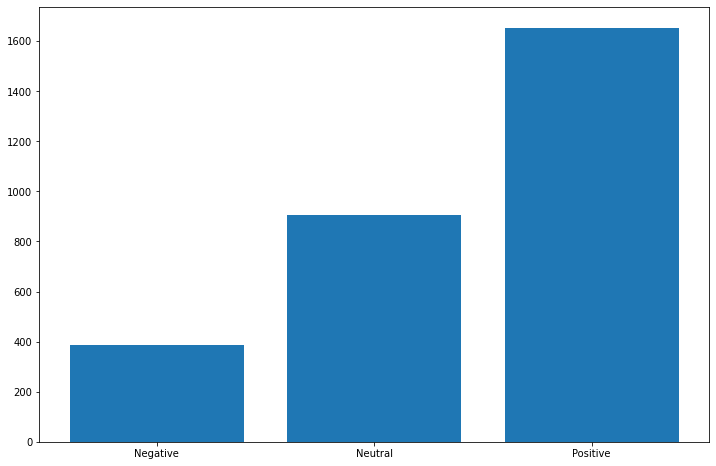

In [ ]:
labels = tweets.groupby('Score').count().index.values

values = tweets.groupby('Score').size().values

plt.bar(labels, values)

# 3) Word Clouds/Topic Modeling 


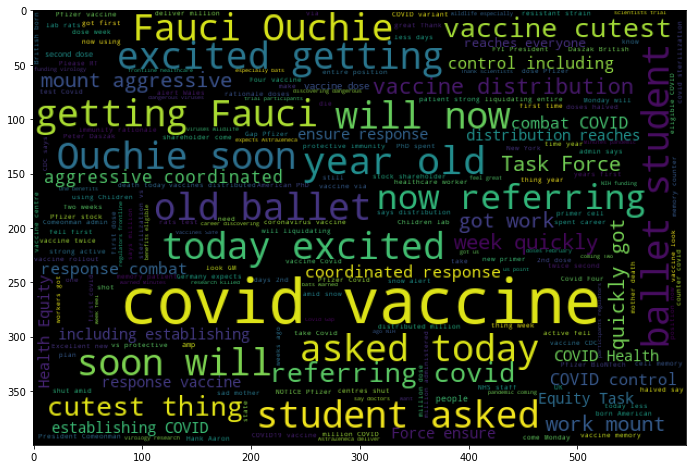

In [ ]:
# Creating a word cloud
words = ' '.join([tweet for tweet in tweets['text']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

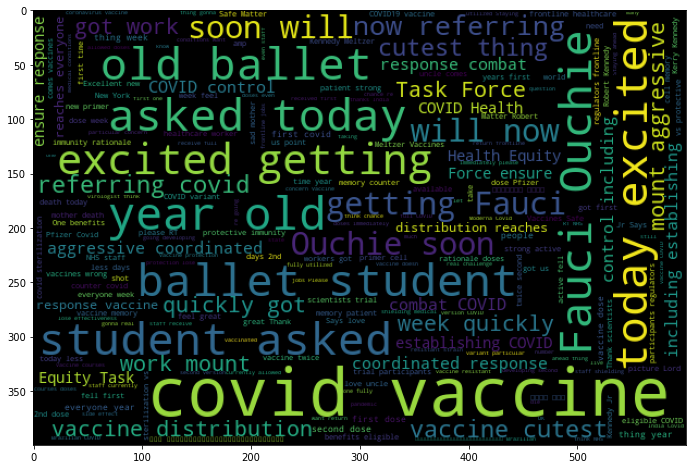

In [249]:
# Creating a word cloud of positive words
tweets_positive = tweets[tweets['Score']=='Positive']

words = ' '.join([tweet for tweet in tweets_positive['text']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

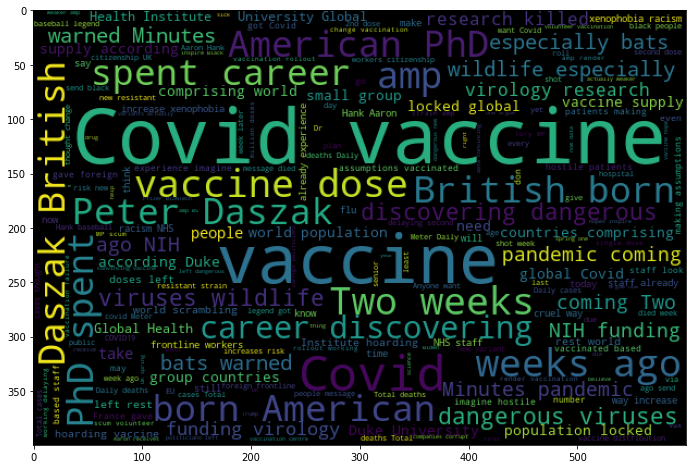

In [250]:
# Creating a word cloud of positive words
tweets_negative = tweets[tweets['Score']=='Negative']

words = ' '.join([tweet for tweet in tweets_negative['text']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

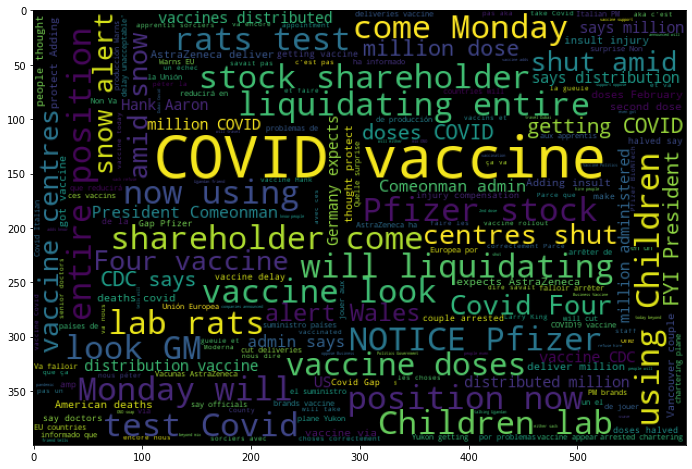

In [251]:
# Creating a word cloud of positive words
tweets_neutral = tweets[tweets['Score']=='Neutral']

words = ' '.join([tweet for tweet in tweets_neutral['text']])
wordCloud = WordCloud(width=600, height=400).generate(words)

plt.imshow(wordCloud)
plt.show()

In [279]:
#grab an example positive tweet to display on the dashboard: 
tweet = tweets_positive['text'][200]
tweet = re.sub('\n', ' ', tweet)
tweet

tweets_positive.iloc[200]
tweets_positive['text'][200]

'5.4 million people across the UK have received their first COVID vaccine dose.\n\nYesterday alone we gave 400,000 vaccinations - an amazing achievement, and I want to thank everyone involved. '

# 4) Parse User Location 

In [ ]:
tweets.user_location

0        Wellington, NZ
1                   NaN
2         United States
3        Shreveport, LA
4          Riom le Beau
             ...       
2944    Los Angeles, CA
2945                NaN
2946         Goshen, IN
2947                NaN
2948          Hong Kong
Name: user_location, Length: 2949, dtype: object

In [ ]:
!pip install geopandas

In [ ]:
!pip install geotext

In [ ]:
import geopandas as gpd

from urllib import request

from geotext import GeoText

In [ ]:
GeoText(tweets.user_location[0]).country_mentions

OrderedDict([('US', 1)])

In [ ]:
tweets['user_location_clean'] = ''
tweets.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,Subjectivity,Polarity,Score,user_location_clean
0,1353087937206870016,seemorerocks,"Next time you're at , getting groceries, you c...",Sat Jan 23 21:11:18 +0000 2021,23/01/2021 21:11:18,NaN,NaN,NaN,NaN,362151710,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4707799903...,440.0,623.0,"Wellington, NZ",http://twitter.com/seemorerocks/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.000000,0.00,Neutral,
1,1353087935286022145,Santiaguerra2,The Oxford/AstraZeneca vaccine protects ag...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,7.177318e+17,Boomclaw,1239225539774296065,1.353056e+18,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1311005089...,74.0,61.0,NaN,http://twitter.com/Santiaguerra2/statuses/1353...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.783333,0.15,Positive,
2,1353087934887567371,OceannaGreen,With my mom being a nurse &amp; always having ...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,1492212866,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1285874750...,126.0,493.0,United States,http://twitter.com/OceannaGreen/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",0.900000,0.60,Positive,
3,1353087933113380869,NBC6News,A third-grade girl has been swamped by phone c...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,70677953,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://pbs.twimg.com/profile_images/1192536971...,11701.0,484.0,"Shreveport, LA",http://twitter.com/NBC6News/statuses/135308793...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",0.000000,0.00,Neutral,
4,1353087932006092804,JeanMarcVILLER,Quelle surprise ! (Non)\nVa falloir arrêter de...,Sat Jan 23 21:11:16 +0000 2021,23/01/2021 21:11:16,NaN,NaN,NaN,NaN,489310581,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/8558744993...,960.0,1253.0,Riom le Beau,http://twitter.com/JeanMarcVILLER/statuses/135...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.000000,0.00,Neutral,


In [ ]:
tweets['user_location_clean'] = tweets['user_location'].apply(lambda x: cleanUpTweet(x) if(np.all(pd.notnull(x))) else '')


In [ ]:
tweets['user_location_clean']

0        Wellington, NZ
1                      
2         United States
3        Shreveport, LA
4          Riom le Beau
             ...       
2944    Los Angeles, CA
2945                   
2946         Goshen, IN
2947                   
2948          Hong Kong
Name: user_location_clean, Length: 2949, dtype: object

In [ ]:
countries = [GeoText(s).country_mentions for s in tweets['user_location_clean']]
cities = [GeoText(s).cities for s in tweets['user_location_clean']]

In [ ]:
tweets['user_cities'] = cities

In [ ]:
tweets['user_cities']

0        [Wellington]
1                  []
2                  []
3        [Shreveport]
4              [Riom]
            ...      
2944    [Los Angeles]
2945               []
2946         [Goshen]
2947               []
2948               []
Name: user_cities, Length: 2949, dtype: object

Format cities and add to data frame, then repeat for countries: 

In [ ]:
cities_new = pd.DataFrame(index=range(len(tweets)),columns=['user_cities_new'], dtype='object')
cities_new['user_cities_new'][0]

nan

In [ ]:
index = -1
for city in tweets['user_cities'].values: 
  index +=1
  if not city: 
    cities_new['user_cities_new'][index] = ''
  else: 
    cities_new['user_cities_new'][index] = city[0]


In [ ]:
tweets['user_cities'] = cities_new['user_cities_new']

In [ ]:
tweets.head()


,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,Subjectivity,Polarity,Score,user_location_clean,user_cities
0,1353087937206870016,seemorerocks,"Next time you're at , getting groceries, you c...",Sat Jan 23 21:11:18 +0000 2021,23/01/2021 21:11:18,NaN,NaN,NaN,NaN,362151710,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4707799903...,440.0,623.0,"Wellington, NZ",http://twitter.com/seemorerocks/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.000000,0.00,Neutral,"Wellington, NZ",Wellington
1,1353087935286022145,Santiaguerra2,The Oxford/AstraZeneca vaccine protects ag...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,7.177318e+17,Boomclaw,1239225539774296065,1.353056e+18,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1311005089...,74.0,61.0,NaN,http://twitter.com/Santiaguerra2/statuses/1353...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.783333,0.15,Positive,,
2,1353087934887567371,OceannaGreen,With my mom being a nurse &amp; always having ...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,1492212866,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1285874750...,126.0,493.0,United States,http://twitter.com/OceannaGreen/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",0.900000,0.60,Positive,United States,
3,1353087933113380869,NBC6News,A third-grade girl has been swamped by phone c...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,70677953,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://pbs.twimg.com/profile_images/1192536971...,11701.0,484.0,"Shreveport, LA",http://twitter.com/NBC6News/statuses/135308793...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",0.000000,0.00,Neutral,"Shreveport, LA",Shreveport
4,1353087932006092804,JeanMarcVILLER,Quelle surprise ! (Non)\nVa falloir arrêter de...,Sat Jan 23 21:11:16 +0000 2021,23/01/2021 21:11:16,NaN,NaN,NaN,NaN,489310581,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/8558744993...,960.0,1253.0,Riom le Beau,http://twitter.com/JeanMarcVILLER/statuses/135...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.000000,0.00,Neutral,Riom le Beau,Riom


In [ ]:
tweets['user_countries'] = countries

countries_new = pd.DataFrame(index=range(len(tweets)),columns=['user_countries_new'], dtype='object')
countries_new['user_countries_new'][0]

nan

In [ ]:
index = -1
for country in tweets['user_countries'].values: 
  index +=1
  if not country: #if null 
    countries_new['user_countries_new'][index] = ''
  else: 
    countries_new['user_countries_new'][index] = list(country.keys())[0]


In [ ]:
countries_new['user_countries_new'][0]

'US'

In [ ]:
tweets['user_countries'] = countries_new['user_countries_new']

In [ ]:
tweets.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,Subjectivity,Polarity,Score,user_location_clean,user_cities,user_countries
0,1353087937206870016,seemorerocks,"Next time you're at , getting groceries, you c...",Sat Jan 23 21:11:18 +0000 2021,23/01/2021 21:11:18,NaN,NaN,NaN,NaN,362151710,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4707799903...,440.0,623.0,"Wellington, NZ",http://twitter.com/seemorerocks/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.000000,0.00,Neutral,"Wellington, NZ",Wellington,US
1,1353087935286022145,Santiaguerra2,The Oxford/AstraZeneca vaccine protects ag...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,7.177318e+17,Boomclaw,1239225539774296065,1.353056e+18,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1311005089...,74.0,61.0,NaN,http://twitter.com/Santiaguerra2/statuses/1353...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.783333,0.15,Positive,,,
2,1353087934887567371,OceannaGreen,With my mom being a nurse &amp; always having ...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,1492212866,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1285874750...,126.0,493.0,United States,http://twitter.com/OceannaGreen/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",0.900000,0.60,Positive,United States,,US
3,1353087933113380869,NBC6News,A third-grade girl has been swamped by phone c...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,70677953,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://pbs.twimg.com/profile_images/1192536971...,11701.0,484.0,"Shreveport, LA",http://twitter.com/NBC6News/statuses/135308793...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",0.000000,0.00,Neutral,"Shreveport, LA",Shreveport,US
4,1353087932006092804,JeanMarcVILLER,Quelle surprise ! (Non)\nVa falloir arrêter de...,Sat Jan 23 21:11:16 +0000 2021,23/01/2021 21:11:16,NaN,NaN,NaN,NaN,489310581,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/8558744993...,960.0,1253.0,Riom le Beau,http://twitter.com/JeanMarcVILLER/statuses/135...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.000000,0.00,Neutral,Riom le Beau,Riom,FR


Now convert country codes to countries: 

In [ ]:
!pip install country_converter --upgrade


In [ ]:
import country_converter as coco

In [ ]:
temp = pd.DataFrame(index=range(len(tweets)),columns=['user_countries_fullnames'], dtype='object')


index = -1
for name in tweets['user_countries'].values:
  index += 1
  if name:
    temp['user_countries_fullnames'][index] = coco.convert(names=name, to='name_short', not_found='')
  else:
    temp['user_countries_fullnames'][index] = ''


In [ ]:
temp

,user_countries_fullnames
0,United States
1,
2,United States
3,United States
4,France
...,...
2944,United States
2945,
2946,United States
2947,


In [ ]:
tweets['user_countries_fullnames'] = temp['user_countries_fullnames']

In [ ]:
tweets.head()

,id_str,from_user,text,created_at,time,geo_coordinates,user_lang,in_reply_to_user_id_str,in_reply_to_screen_name,from_user_id_str,in_reply_to_status_id_str,source,profile_image_url,user_followers_count,user_friends_count,user_location,status_url,entities_str,Subjectivity,Polarity,Score,user_location_clean,user_cities,user_countries,user_countries_fullnames
0,1353087937206870016,seemorerocks,"Next time you're at , getting groceries, you c...",Sat Jan 23 21:11:18 +0000 2021,23/01/2021 21:11:18,NaN,NaN,NaN,NaN,362151710,NaN,"<a href=""http://twitter.com/#!/download/ipad"" ...",http://pbs.twimg.com/profile_images/4707799903...,440.0,623.0,"Wellington, NZ",http://twitter.com/seemorerocks/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.000000,0.00,Neutral,"Wellington, NZ",Wellington,US,United States
1,1353087935286022145,Santiaguerra2,The Oxford/AstraZeneca vaccine protects ag...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,7.177318e+17,Boomclaw,1239225539774296065,1.353056e+18,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1311005089...,74.0,61.0,NaN,http://twitter.com/Santiaguerra2/statuses/1353...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.783333,0.15,Positive,,,,
2,1353087934887567371,OceannaGreen,With my mom being a nurse &amp; always having ...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,1492212866,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://pbs.twimg.com/profile_images/1285874750...,126.0,493.0,United States,http://twitter.com/OceannaGreen/statuses/13530...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",0.900000,0.60,Positive,United States,,US,United States
3,1353087933113380869,NBC6News,A third-grade girl has been swamped by phone c...,Sat Jan 23 21:11:17 +0000 2021,23/01/2021 21:11:17,NaN,NaN,NaN,NaN,70677953,NaN,"<a href=""http://www.socialflow.com"" rel=""nofol...",http://pbs.twimg.com/profile_images/1192536971...,11701.0,484.0,"Shreveport, LA",http://twitter.com/NBC6News/statuses/135308793...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[]...",0.000000,0.00,Neutral,"Shreveport, LA",Shreveport,US,United States
4,1353087932006092804,JeanMarcVILLER,Quelle surprise ! (Non)\nVa falloir arrêter de...,Sat Jan 23 21:11:16 +0000 2021,23/01/2021 21:11:16,NaN,NaN,NaN,NaN,489310581,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",http://pbs.twimg.com/profile_images/8558744993...,960.0,1253.0,Riom le Beau,http://twitter.com/JeanMarcVILLER/statuses/135...,"{""hashtags"":[],""symbols"":[],""user_mentions"":[{...",0.000000,0.00,Neutral,Riom le Beau,Riom,FR,France


In [ ]:
tweets.to_csv('tweets_full.csv')